In [198]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


# Intro
Accuracy/interpretability tradeoff  
Importance of interpretability + transparency in the light of GDPR

# Used libraries and methods

## ELI5 

#### Feature importance 
#### Permutation importance

## Partial dependence plots / Individual Conditional Expectation (PDP/ICE)
PDP visualizes marginal effect of a given feature denoted S by plotting average model outcome for different values of the predictor, denoted C. 

\begin{equation*}
f_{x_S}=E_{x_C}[f(x_S,x_C)]=\int f(x_S,x_C) dP(x_C)
\end{equation*}

To substitute for integration over every value, the formula is estimated by:

\begin{equation*}
\hat{f_{x_S}}=\frac{1}{N}\sum_{i=1} \hat{f}(x_S,x_{C_i})
\end{equation*}

Where x_s is the value of a chosen feature for which we'd like to get marginal effect on the output, N is number of all the observations and x_c are the values of every other feature of all the other observations. By repeating this process for all the x_s we get a line of average contributions of the chosen feature, called PDP.




## LIME  
Creating local explanation by generating data around observations and fitting interpretable model around them.

## SHAP
Using game theory - treating features as players and calculating their contribution. This allows as to interpret the model globally in some sense by looking at many predictions at once or locally by looking at shapley values for single prediction. Below, is denoted a modified for machine learning equation for computing contribution of players in a game. It calculates shapley values for a single feature <em>i</em> in single a observation:

\begin{equation*}
\phi_i(f,x)=\sum_{z' \subseteq x'} \frac{|z'|!(M-|z'|-1)!}{M!}[f_x(z')-f_x(z'\setminus i)]
\end{equation*}

F is the model, x is the observation to be explained. M denotes the number of features, z' is a vector where some subset of explained instance is present. For feature to be missing is to substitute its value with expected expected value of the feature across the entire dataset. First part of the sum calculates how many of all possible feature permutation current summation step describes. |z'| denotes the number of features we have present - similar to the player contribution equation, nominator counts the all the possibilites of how all the other players (here features) could have come before and after currently evaluated player for given subset of players. By dividing it by all possible feature permutation, we get it's weight. The final subtraction is the marginal effect of currently evaluated evaluated feature.

## SKATER
Not working yet.


# Exploring the data

## About the dataset
Dataset: https://community.fico.com/s/explainable-machine-learning-challenge

...

In [199]:
df = pd.read_csv('heloc_dataset_v1.csv')

dataset = df.copy()

In [200]:
data_description = pd.read_excel('heloc_data_dictionary-2.xlsx')
print(data_description)

                                       Variable Names  \
0                                     RiskPerformance   
1                                ExternalRiskEstimate   
2                               MSinceOldestTradeOpen   
3                           MSinceMostRecentTradeOpen   
4                                      AverageMInFile   
5                               NumSatisfactoryTrades   
6                         NumTrades60Ever2DerogPubRec   
7                         NumTrades90Ever2DerogPubRec   
8                              PercentTradesNeverDelq   
9                                MSinceMostRecentDelq   
10                           MaxDelq2PublicRecLast12M   
11                                        MaxDelqEver   
12                                     NumTotalTrades   
13                             NumTradesOpeninLast12M   
14                               PercentInstallTrades   
15                       MSinceMostRecentInqexcl7days   
16                             

In [201]:
print(dataset.head(10))

  RiskPerformance  ExternalRiskEstimate  MSinceOldestTradeOpen  \
0             Bad                    55                    144   
1             Bad                    61                     58   
2             Bad                    67                     66   
3             Bad                    66                    169   
4             Bad                    81                    333   
5             Bad                    59                    137   
6            Good                    54                     88   
7            Good                    68                    148   
8             Bad                    59                    324   
9             Bad                    61                     79   

   MSinceMostRecentTradeOpen  AverageMInFile  NumSatisfactoryTrades  \
0                          4              84                     20   
1                         15              41                      2   
2                          5              24                

In [202]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10459 entries, 0 to 10458
Data columns (total 24 columns):
RiskPerformance                       10459 non-null object
ExternalRiskEstimate                  10459 non-null int64
MSinceOldestTradeOpen                 10459 non-null int64
MSinceMostRecentTradeOpen             10459 non-null int64
AverageMInFile                        10459 non-null int64
NumSatisfactoryTrades                 10459 non-null int64
NumTrades60Ever2DerogPubRec           10459 non-null int64
NumTrades90Ever2DerogPubRec           10459 non-null int64
PercentTradesNeverDelq                10459 non-null int64
MSinceMostRecentDelq                  10459 non-null int64
MaxDelq2PublicRecLast12M              10459 non-null int64
MaxDelqEver                           10459 non-null int64
NumTotalTrades                        10459 non-null int64
NumTradesOpeninLast12M                10459 non-null int64
PercentInstallTrades                  10459 non-null int64
MSinc

In [203]:
print(dataset.describe())

       ExternalRiskEstimate  MSinceOldestTradeOpen  MSinceMostRecentTradeOpen  \
count          10459.000000           10459.000000               10459.000000   
mean              67.425758             184.205373                   8.543455   
std               21.121621             109.683816                  13.301745   
min               -9.000000              -9.000000                  -9.000000   
25%               63.000000             118.000000                   3.000000   
50%               71.000000             178.000000                   5.000000   
75%               79.000000             249.500000                  11.000000   
max               94.000000             803.000000                 383.000000   

       AverageMInFile  NumSatisfactoryTrades  NumTrades60Ever2DerogPubRec  \
count    10459.000000           10459.000000                 10459.000000   
mean        73.843293              19.428052                     0.042738   
std         38.782803              13.0

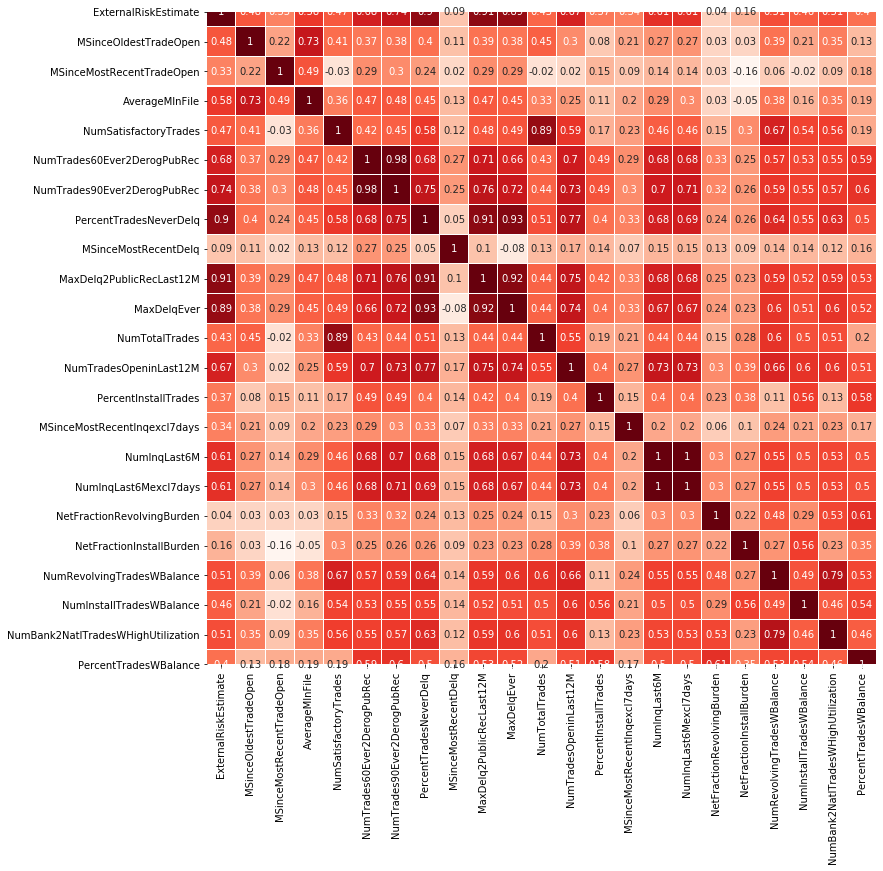

In [204]:
plt.figure(figsize=(12,12))
corr = dataset.corr()
sns.heatmap(round(corr, 2), annot=True, cmap='Reds', linewidths=0.01, cbar=False, );

<div style='background-color:#e0dab6; padding:20px'>

# Training and evaluating the models  
(Contest winners achieved accuraties of ~74% with complex models)

</div>

In [205]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, classification_report
import tensorflow as tf

In [206]:
#Preparing the data

target = 'RiskPerformance'

df = pd.read_csv('heloc_dataset_v1.csv')
y = (df[target] == 'Bad').astype(int)
X = df.drop(target, axis=1)
feature_names = X.columns
feature_names = [feature + ": " + str(idx+1) for idx, feature in enumerate(feature_names)]

print('Percentage of "Bad" target values: ' + str(sum(y)/len(y)))

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.33, random_state=42)
X_test_smaller = X_test[:150]

X_train_norm = tf.keras.utils.normalize(X_train, axis=1)
X_test_norm = tf.keras.utils.normalize(X_test, axis=1)

Percentage of "Bad" target values: 0.5219428243617936


Features are ready to use - there is no rish of data leakage.  
Data is balanced, accuracy will be used as model evaluation metric.

### Linear regression - interpretable model.

In [207]:
# Without normalization

from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state = 42, solver='lbfgs', max_iter = 2000).fit(X_train, y_train)

log_predictions = log_model.predict(X_test)

print(confusion_matrix(y_test, log_predictions))
print(classification_report(y_test, log_predictions))

[[1071  562]
 [ 454 1365]]
              precision    recall  f1-score   support

           0       0.70      0.66      0.68      1633
           1       0.71      0.75      0.73      1819

    accuracy                           0.71      3452
   macro avg       0.71      0.70      0.70      3452
weighted avg       0.71      0.71      0.70      3452



In [208]:
# With normalization

from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state = 42, solver='lbfgs', max_iter = 2000).fit(X_train_norm, y_train)

log_predictions_norm = log_model.predict(X_test_norm)

print(confusion_matrix(y_test, log_predictions))
print(classification_report(y_test, log_predictions))

[[1071  562]
 [ 454 1365]]
              precision    recall  f1-score   support

           0       0.70      0.66      0.68      1633
           1       0.71      0.75      0.73      1819

    accuracy                           0.71      3452
   macro avg       0.71      0.70      0.70      3452
weighted avg       0.71      0.71      0.70      3452



### Random forest

In [209]:
from sklearn.ensemble import RandomForestClassifier

In [210]:
# Without normalization

tree_model = RandomForestClassifier(n_estimators = 30, random_state=1).fit(X_train, y_train)
tree_predictions = tree_model.predict(X_test)

print(confusion_matrix(y_test, tree_predictions))
print(classification_report(y_test, tree_predictions))

[[1068  565]
 [ 428 1391]]
              precision    recall  f1-score   support

           0       0.71      0.65      0.68      1633
           1       0.71      0.76      0.74      1819

    accuracy                           0.71      3452
   macro avg       0.71      0.71      0.71      3452
weighted avg       0.71      0.71      0.71      3452



In [211]:
#With normalization

forest_model = RandomForestClassifier(n_estimators = 30, random_state=1).fit(X_train_norm, y_train)
forest_predictions_norm = tree_model.predict(X_test_norm)

print(confusion_matrix(y_test, tree_predictions))
print(classification_report(y_test, tree_predictions))

[[1068  565]
 [ 428 1391]]
              precision    recall  f1-score   support

           0       0.71      0.65      0.68      1633
           1       0.71      0.76      0.74      1819

    accuracy                           0.71      3452
   macro avg       0.71      0.71      0.71      3452
weighted avg       0.71      0.71      0.71      3452



### Neural Network

In [212]:
# Without normalization

nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(12, activation=tf.nn.relu, input_shape=X_train.shape[1:]))
nn_model.add(tf.keras.layers.Dense(6, activation=tf.nn.relu, input_shape=X_train.shape[1:]))
nn_model.add(tf.keras.layers.Dense(1, activation=tf.nn.sigmoid))

nn_model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy']);

In [213]:
nn_model.fit(X_train, y_train, batch_size=32, epochs=15);

Epoch 1/15
7007/7007 [==============================] - 1s 95us/sample - loss: 1.3363 - acc: 0.4966
Epoch 2/15
7007/7007 [==============================] - 1s 72us/sample - loss: 0.6971 - acc: 0.5158
Epoch 3/15
7007/7007 [==============================] - 1s 73us/sample - loss: 0.6926 - acc: 0.5276
Epoch 4/15
7007/7007 [==============================] - 2s 216us/sample - loss: 0.6857 - acc: 0.5412
Epoch 5/15
7007/7007 [==============================] - 1s 74us/sample - loss: 0.6829 - acc: 0.5469
Epoch 6/15
7007/7007 [==============================] - 1s 128us/sample - loss: 0.6767 - acc: 0.5617
Epoch 7/15
7007/7007 [==============================] - 2s 229us/sample - loss: 0.6657 - acc: 0.6043
Epoch 8/15
7007/7007 [==============================] - 1s 88us/sample - loss: 0.6547 - acc: 0.6295
Epoch 9/15
7007/7007 [==============================] - 1s 116us/sample - loss: 0.6480 - acc: 0.6376
Epoch 10/15
7007/7007 [==============================] - 1s 87us/sample - loss: 0.6363 - acc: 0.

In [214]:
nn_loss, nn_acc = nn_model.evaluate(X_test, y_test)
print('Loss: ' + str(nn_loss))
print(nn_acc)

#PREDICTIONS - probability of bad risk performance

nn_predictions = nn_model.predict(X_test)
nn_predictions = [1 if pred >= 0.5 else 0 for pred in nn_predictions]

nn_matches = [1 if i == j else 0 for i, j in zip(nn_predictions, y_test)] # Matches calculated for later usage
nn_accuracy = sum(nn_matches)/len(nn_matches)
print('Accuracy: ' + str(nn_accuracy))

3452/3452 [==============================] - 0s 61us/sample - loss: 0.6028 - acc: 0.6703
Loss: 0.6028035723734841
0.670336
Accuracy: 0.6703360370799536


In [215]:
# With normalization

nn_model_norm = tf.keras.models.Sequential()
nn_model_norm.add(tf.keras.layers.Dense(12, activation=tf.nn.relu, input_shape=X_train.shape[1:]))
nn_model_norm.add(tf.keras.layers.Dense(6, activation=tf.nn.relu, input_shape=X_train.shape[1:]))
nn_model_norm.add(tf.keras.layers.Dense(1, activation=tf.nn.sigmoid))

nn_model_norm.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy']);

In [216]:
nn_model_norm.fit(X_train_norm, y_train, batch_size=32, epochs=15);

Epoch 1/15
7007/7007 [==============================] - 1s 89us/sample - loss: 0.6769 - acc: 0.6082
Epoch 2/15
7007/7007 [==============================] - 0s 65us/sample - loss: 0.6303 - acc: 0.6641
Epoch 3/15
7007/7007 [==============================] - 0s 63us/sample - loss: 0.6103 - acc: 0.6748
Epoch 4/15
7007/7007 [==============================] - 0s 60us/sample - loss: 0.6018 - acc: 0.6827
Epoch 5/15
7007/7007 [==============================] - 0s 61us/sample - loss: 0.5981 - acc: 0.6843
Epoch 6/15
7007/7007 [==============================] - 0s 60us/sample - loss: 0.5959 - acc: 0.6892
Epoch 7/15
7007/7007 [==============================] - 0s 59us/sample - loss: 0.5941 - acc: 0.6882
Epoch 8/15
7007/7007 [==============================] - 0s 65us/sample - loss: 0.5925 - acc: 0.6896
Epoch 9/15
7007/7007 [==============================] - 0s 58us/sample - loss: 0.5912 - acc: 0.6925
Epoch 10/15
7007/7007 [==============================] - 0s 58us/sample - loss: 0.5894 - acc: 0.6923

In [217]:
nn_loss_norm, nn_acc_norm = nn_model_norm.evaluate(X_test_norm, y_test)
print('Loss: ' + str(nn_loss_norm))
print(nn_acc_norm)

#PREDICTIONS - probability of bad risk performance

nn_predictions_percent_norm = nn_model_norm.predict(X_test_norm)
nn_predictions_norm = [1 if pred >= 0.5 else 0 for pred in nn_predictions_percent_norm]

nn_matches_norm = [1 if i == j else 0 for i, j in zip(nn_predictions_norm, y_test)] # Matches calculated for later usage
nn_accuracy_norm = sum(nn_matches_norm)/len(nn_matches_norm)
print('Accuracy: ' + str(nn_accuracy_norm))

3452/3452 [==============================] - 0s 63us/sample - loss: 0.5991 - acc: 0.6782
Loss: 0.5991220936990695
0.67815757
Accuracy: 0.6781575898030128


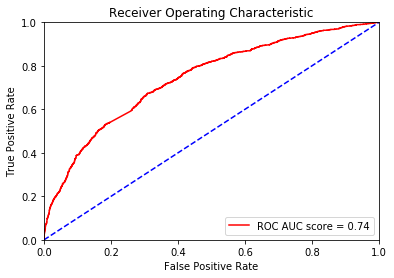

In [218]:
preds = nn_predictions_percent_norm[:]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'red', label = 'ROC AUC score = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'b--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<div style='background-color:#b6e0ba; padding:20px'>
    
# Explaining models decisions

</div>

In [219]:
import eli5
from eli5.sklearn import PermutationImportance


from pdpbox import pdp, get_dataset, info_plots
import shap
import lime

shap.initjs()

# Interpretable model
Logistic regression

In [220]:
log_reg_df = pd.DataFrame()
log_reg_df['Feature'] = feature_names
log_reg_df['Coefficient'] = log_model.coef_[0]
log_reg_df.style.background_gradient(cmap='magma', subset=['Coefficient']).highlight_max(subset=['Coefficient']).set_caption('This is a custom caption.')

,Feature,Coefficient
0,ExternalRiskEstimate: 1,-3.39308
1,MSinceOldestTradeOpen: 2,-1.0396
2,MSinceMostRecentTradeOpen: 3,1.23721
3,AverageMInFile: 4,-2.07044
4,NumSatisfactoryTrades: 5,-1.8172
5,NumTrades60Ever2DerogPubRec: 6,1.39189
6,NumTrades90Ever2DerogPubRec: 7,0.867154
7,PercentTradesNeverDelq: 8,-0.998163
8,MSinceMostRecentDelq: 9,1.09337
9,MaxDelq2PublicRecLast12M: 10,-1.87248


# Permutation importance

In [221]:
perm = PermutationImportance(tree_model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=feature_names)

Weight,Feature
0.0384 ± 0.0068,ExternalRiskEstimate: 1
0.0239 ± 0.0073,AverageMInFile: 4
0.0203 ± 0.0104,NetFractionRevolvingBurden: 18
0.0190 ± 0.0041,MSinceMostRecentInqexcl7days: 15
0.0183 ± 0.0061,PercentTradesNeverDelq: 8
0.0133 ± 0.0048,PercentTradesWBalance: 23
0.0122 ± 0.0070,MSinceOldestTradeOpen: 2
0.0111 ± 0.0044,MSinceMostRecentDelq: 9
0.0110 ± 0.0034,NumSatisfactoryTrades: 5
0.0083 ± 0.0028,MaxDelqEver: 11


# Partial Dependence Plots

## Univariate Partial Dependence Plots

In [222]:
def plot_pdp(model, df, feature, cluster_flag=False, nb_clusters=None, lines_flag=False):
    plt.figure(figsize=(2,1))
    pdp_goals = pdp.pdp_isolate(model=model, dataset=df, model_features=df.columns.tolist(), feature=feature)
    pdp.pdp_plot(pdp_goals, feature, cluster=cluster_flag, n_cluster_centers=nb_clusters, plot_lines=lines_flag)
    plt.show()

### Tree model

<Figure size 144x72 with 0 Axes>

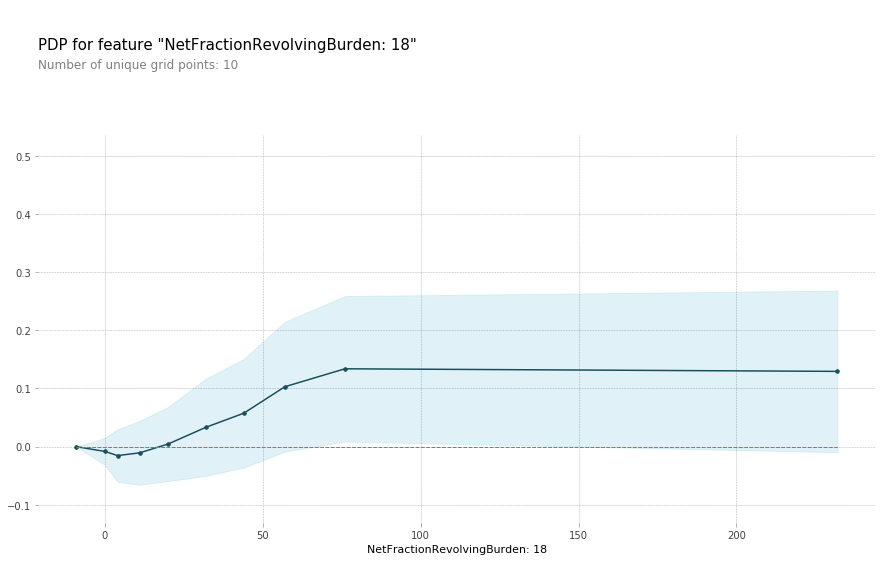

In [223]:
plot_pdp(tree_model, pd.DataFrame(X_test, columns=feature_names), feature_names[17])

### Artificial neural network

<Figure size 144x72 with 0 Axes>

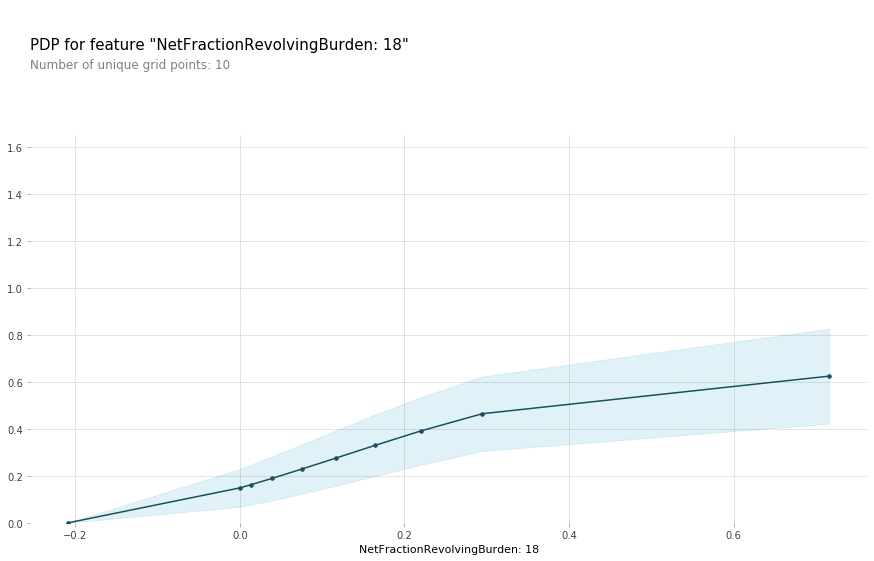

In [224]:
plot_pdp(nn_model_norm, pd.DataFrame(X_test_norm, columns=feature_names), feature_names[17])

## Univariate ICE plot

<Figure size 144x72 with 0 Axes>

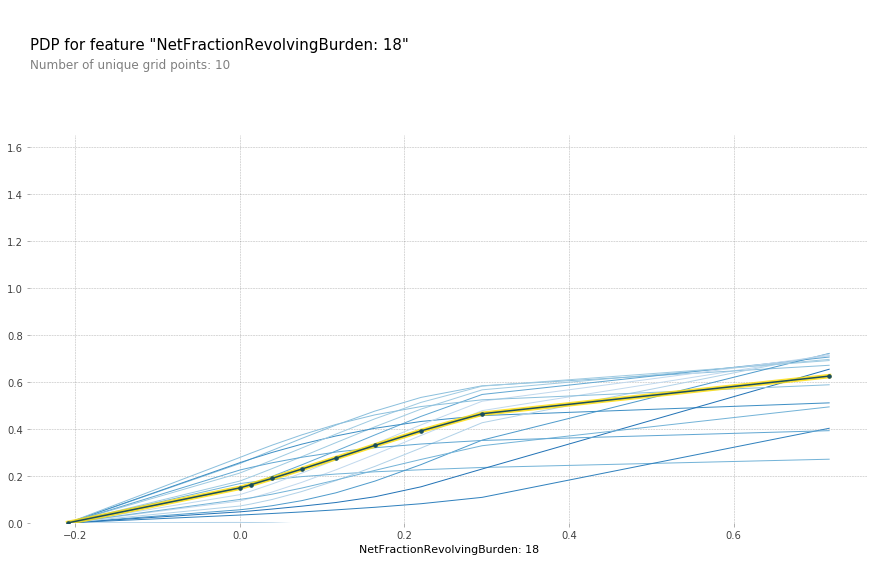

In [225]:
plot_pdp(nn_model_norm, pd.DataFrame(X_test_norm, columns=feature_names), feature_names[17], cluster_flag=True, nb_clusters=16, lines_flag=True)

## Bivariate partial dependence plot

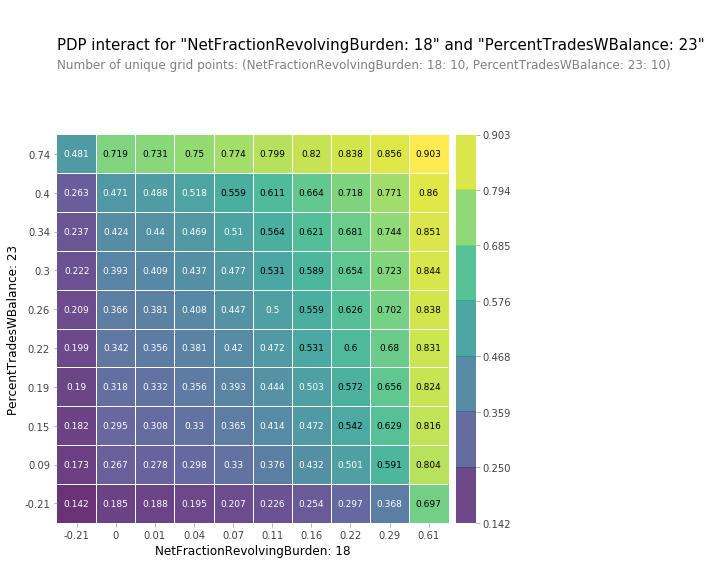

In [226]:
features_to_plot = [feature_names[17], feature_names[22]]
inter1  =  pdp.pdp_interact(model=nn_model_norm, dataset=pd.DataFrame(X_train_norm, columns=feature_names), model_features=feature_names, features=features_to_plot)
pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='grid')

plt.show()

# SHAP

### Tree model

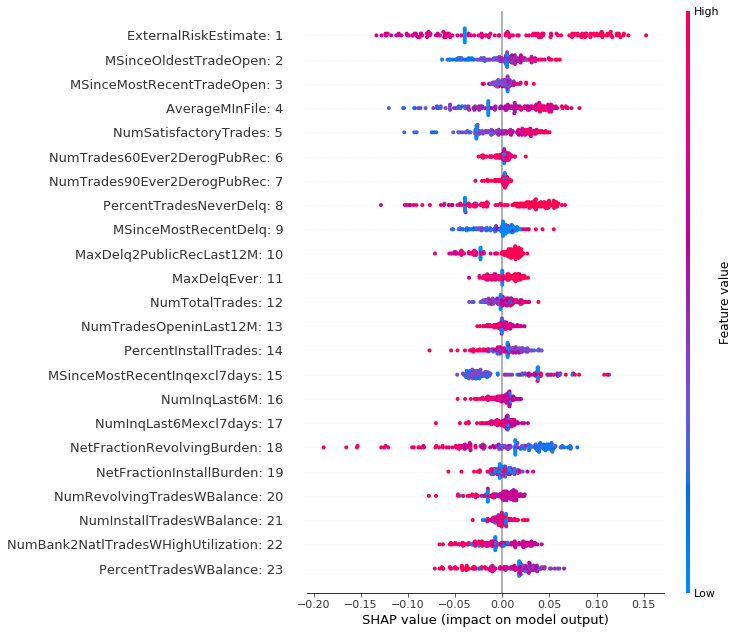

In [227]:
tree_explainer = shap.TreeExplainer(tree_model)
tree_shap_values = tree_explainer.shap_values(X_test_smaller)
shap.summary_plot(tree_shap_values[0], X_test_smaller, feature_names=feature_names, sort=False, max_display=23)

### Artificial neural network

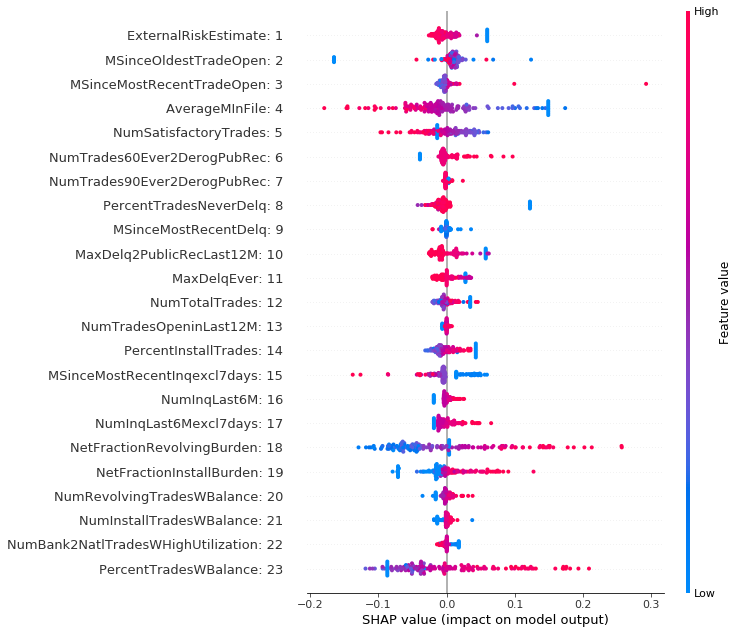

In [228]:
# Without normalization

nn_explainer = shap.DeepExplainer(nn_model, X_test_smaller)
nn_shap_values = nn_explainer.shap_values(X_test_smaller)
shap.summary_plot(nn_shap_values[0], X_test_smaller, feature_names=feature_names, sort=False, max_display=23)

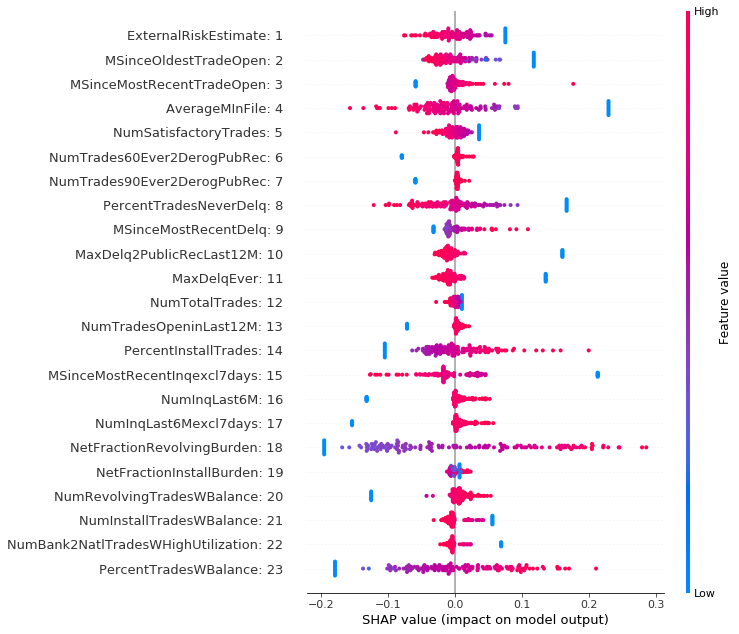

In [229]:
# With normalization

X_test_norm_smaller = X_test_norm[:150]

nn_norm_explainer = shap.DeepExplainer(nn_model_norm, X_test_norm_smaller)
nn_norm_shap_values = nn_norm_explainer.shap_values(X_test_norm_smaller)
shap.summary_plot(nn_norm_shap_values[0], X_test_norm_smaller, feature_names=feature_names, sort=False, max_display=23)

In [230]:
shap.force_plot(nn_norm_explainer.expected_value, nn_norm_shap_values[0], X_test_norm_smaller)

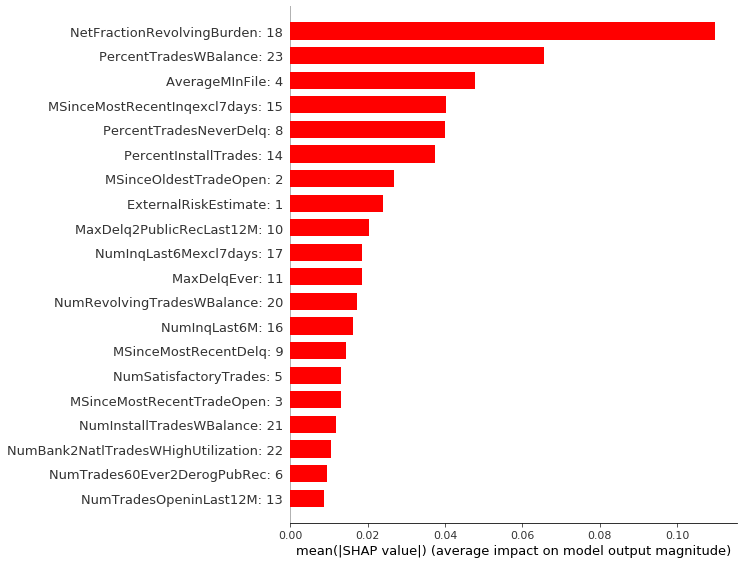

In [231]:
#Average of the shapley values

shap.summary_plot(nn_norm_shap_values[0], X_test_norm_smaller, plot_type="bar", color='red', feature_names=feature_names)

<div style='background-color:#bceaf5; padding:20px'>
    
# Modifying the data and getting desired output with interpretability information

</div>

By looking at the model interpretation, observations will be modified as little as possible to change the model's decision.

In [232]:
# Observation with a bad risk performed will be evaluated and modified to change model's decision
shap.force_plot(nn_norm_explainer.expected_value, nn_norm_shap_values[0][31], feature_names=feature_names)

The model predicted the right outcome for observation 31, however it was not sure with only 51% certainty.
Tweaking the most important features a little should change the model prediction. 
Analyzing the summary plot of the model gives an idea of how should we change them.
If the person would like to have a good risk performance, the best bet
would be to increase his Average Months in File (feature 4) and decreasing Percent Trades with Balance (feature 23).

In [234]:
mod_x = X_test_norm[31].copy()
mod_x[3] = mod_x[3]*1.1
mod_x[22] = mod_x[22]*0.9

mod_shap_vals = nn_norm_explainer.shap_values(np.asarray([mod_x]))
shap.force_plot(nn_norm_explainer.expected_value, mod_shap_vals[0][0], feature_names=feature_names)

Slight change in the features resulted in a different prediction.

In [235]:
#Finding a good match


# print(y_test[9])
print([(i, y_test[i])for i, x in enumerate(nn_matches_norm) if x == 1 and y_test[i] == 1 and nn_predictions_percent_norm[i] < 0.53])


[(13, 1), (31, 1), (36, 1), (60, 1), (78, 1), (89, 1), (165, 1), (337, 1), (345, 1), (355, 1), (412, 1), (569, 1), (737, 1), (776, 1), (835, 1), (1047, 1), (1118, 1), (1185, 1), (1372, 1), (1402, 1), (1417, 1), (1430, 1), (1436, 1), (1450, 1), (1503, 1), (1664, 1), (1688, 1), (1739, 1), (1762, 1), (1763, 1), (1868, 1), (1892, 1), (1955, 1), (2004, 1), (2065, 1), (2182, 1), (2197, 1), (2259, 1), (2260, 1), (2294, 1), (2321, 1), (2354, 1), (2371, 1), (2600, 1), (2603, 1), (2610, 1), (2679, 1), (2817, 1), (2900, 1), (2941, 1), (3003, 1), (3010, 1), (3087, 1), (3131, 1), (3185, 1), (3228, 1), (3257, 1), (3277, 1), (3331, 1), (3400, 1), (3412, 1), (3436, 1), (3448, 1)]


<div style='background-color:#e7ffdb; padding:20px'>
    
# Rough summary

Neural network with normalization learned linear, monotonic dependecies, given in the data description file; probably no non-linear connections between features are present.

Publications/books:  
Dataset challange winner's solution: https://community.fico.com/s/blog-post/a5Q2E0000001czyUAA/fico1670  
Lime paper: https://arxiv.org/abs/1602.04938  
Shap paper: https://arxiv.org/abs/1705.07874  
ICE/PDP paper: https://arxiv.org/abs/1309.6392  
Shap paper with for tree ensembles: https://arxiv.org/pdf/1802.03888.pdf  
Arguments against explainability of black box models: https://arxiv.org/abs/1811.10154  
Interpretability book: https://christophm.github.io/interpretable-ml-book/



Tutorials/articles:  
https://github.com/cog-data/ML_Interpretability_tutorial/blob/master/Machine_Learning_Interpretability_tutorial.ipynb  
https://towardsdatascience.com/one-feature-attribution-method-to-supposedly-rule-them-all-shapley-values-f3e04534983d 
https://towardsdatascience.com/interpreting-your-deep-learning-model-by-shap-e69be2b47893


https://www.kaggle.com/learn/machine-learning-explainability

https://towardsdatascience.com/explainable-artificial-intelligence-part-2-model-interpretation-strategies-75d4afa6b739
https://www.oreilly.com/ideas/interpreting-predictive-models-with-skater-unboxing-model-opacity - SKATER